In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Your data folder path (adjust if needed)
DATA_DIR = '../data/raw/PlantVillage'

# Check if data path exists, else stop here
assert os.path.exists(DATA_DIR), f"Data path {DATA_DIR} does not exist"


In [2]:
classes = sorted([folder for folder in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, folder))])
print(f"Found {len(classes)} classes:\n", classes)


Found 15 classes:
 ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


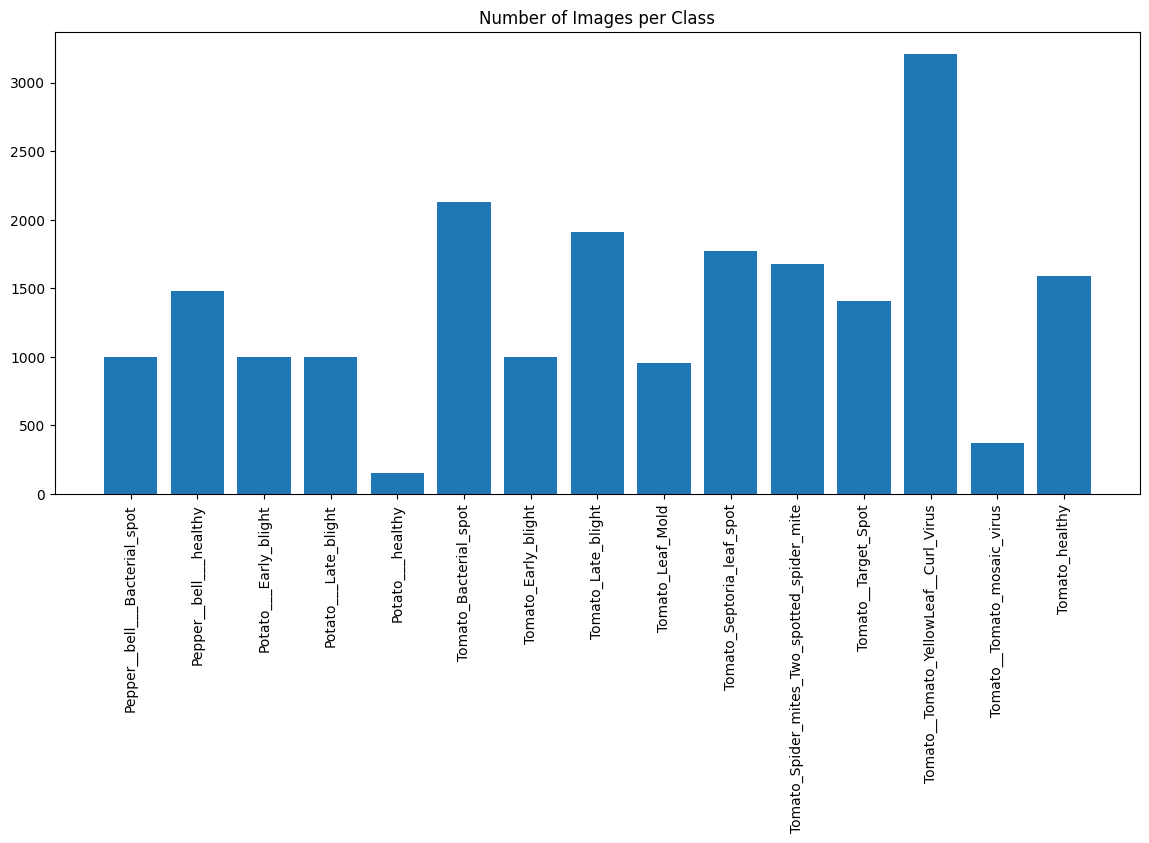

In [3]:
class_counts = {}
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    class_counts[cls] = len(images)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.show()


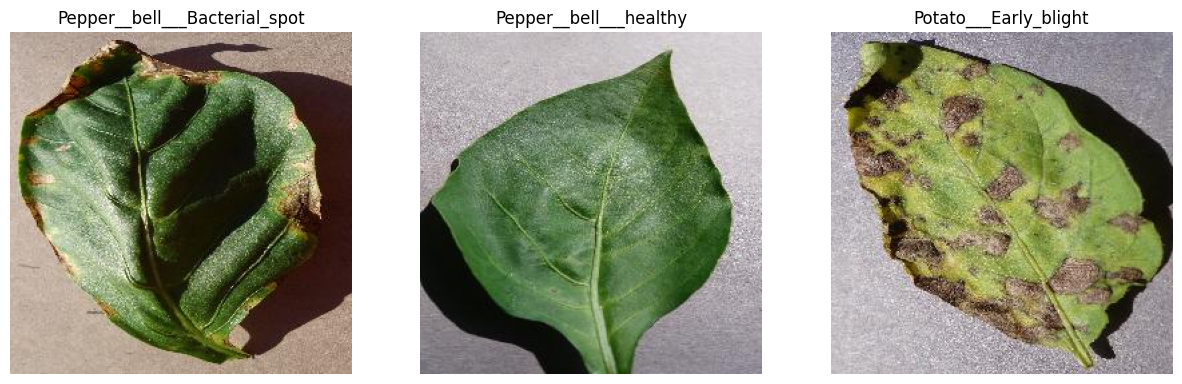

In [4]:
plt.figure(figsize=(15, 5))
sample_classes = classes[:3]  # show 3 classes; change if you want

for i, cls in enumerate(sample_classes):
    cls_path = os.path.join(DATA_DIR, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    sample_img = random.choice(images)
    img_path = os.path.join(cls_path, sample_img)
    img = Image.open(img_path)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.10.0


In [6]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # common input size for models like MobileNet, ResNet

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
)


Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.
